# Churn Prediction

### TechnoHacks Task 7 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
%matplotlib inline

In [8]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [9]:
data.shape

(7043, 21)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.drop('customerID',axis=1,inplace=True)

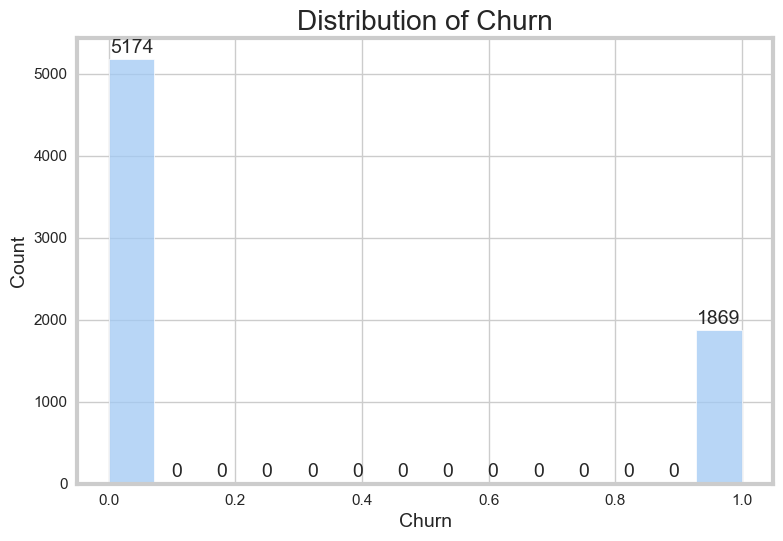

In [38]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
ax = sns.histplot(data=data, x="Churn")
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 2), textcoords='offset points', ha='center', va='bottom')
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Distribution of Churn")
plt.show()

Shape of your Data Set loaded: (7043, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    21 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['customerID']
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
customerID,object,0.000000,100,nan,nan,"Possible ID colum: drop before modeling process., 7043 rare categories: Too many to list. Group them into a single category or drop the categories., high cardinality with 7043 unique values: Use hash encoding or embedding to reduce dimension."
gender,object,0.000000,0,nan,nan,No issue
SeniorCitizen,int64,0.000000,0,0.000000,1.000000,has 1142 outliers greater than upper bound (0.00) or lower than lower bound(0.00). Cap them or remove them.
Partner,object,0.000000,0,nan,nan,No issue
Dependents,object,0.000000,0,nan,nan,No issue
tenure,int64,0.000000,1,0.000000,72.000000,No issue
PhoneService,object,0.000000,0,nan,nan,No issue
MultipleLines,object,0.000000,0,nan,nan,No issue
InternetService,object,0.000000,0,nan,nan,No issue
OnlineSecurity,object,0.000000,0,nan,nan,No issue


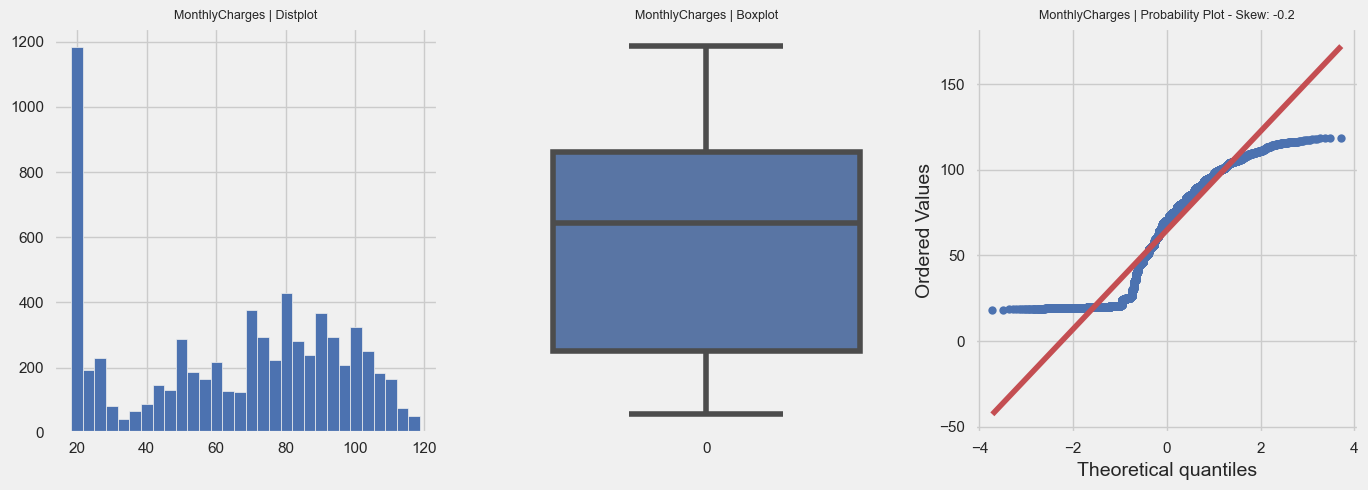

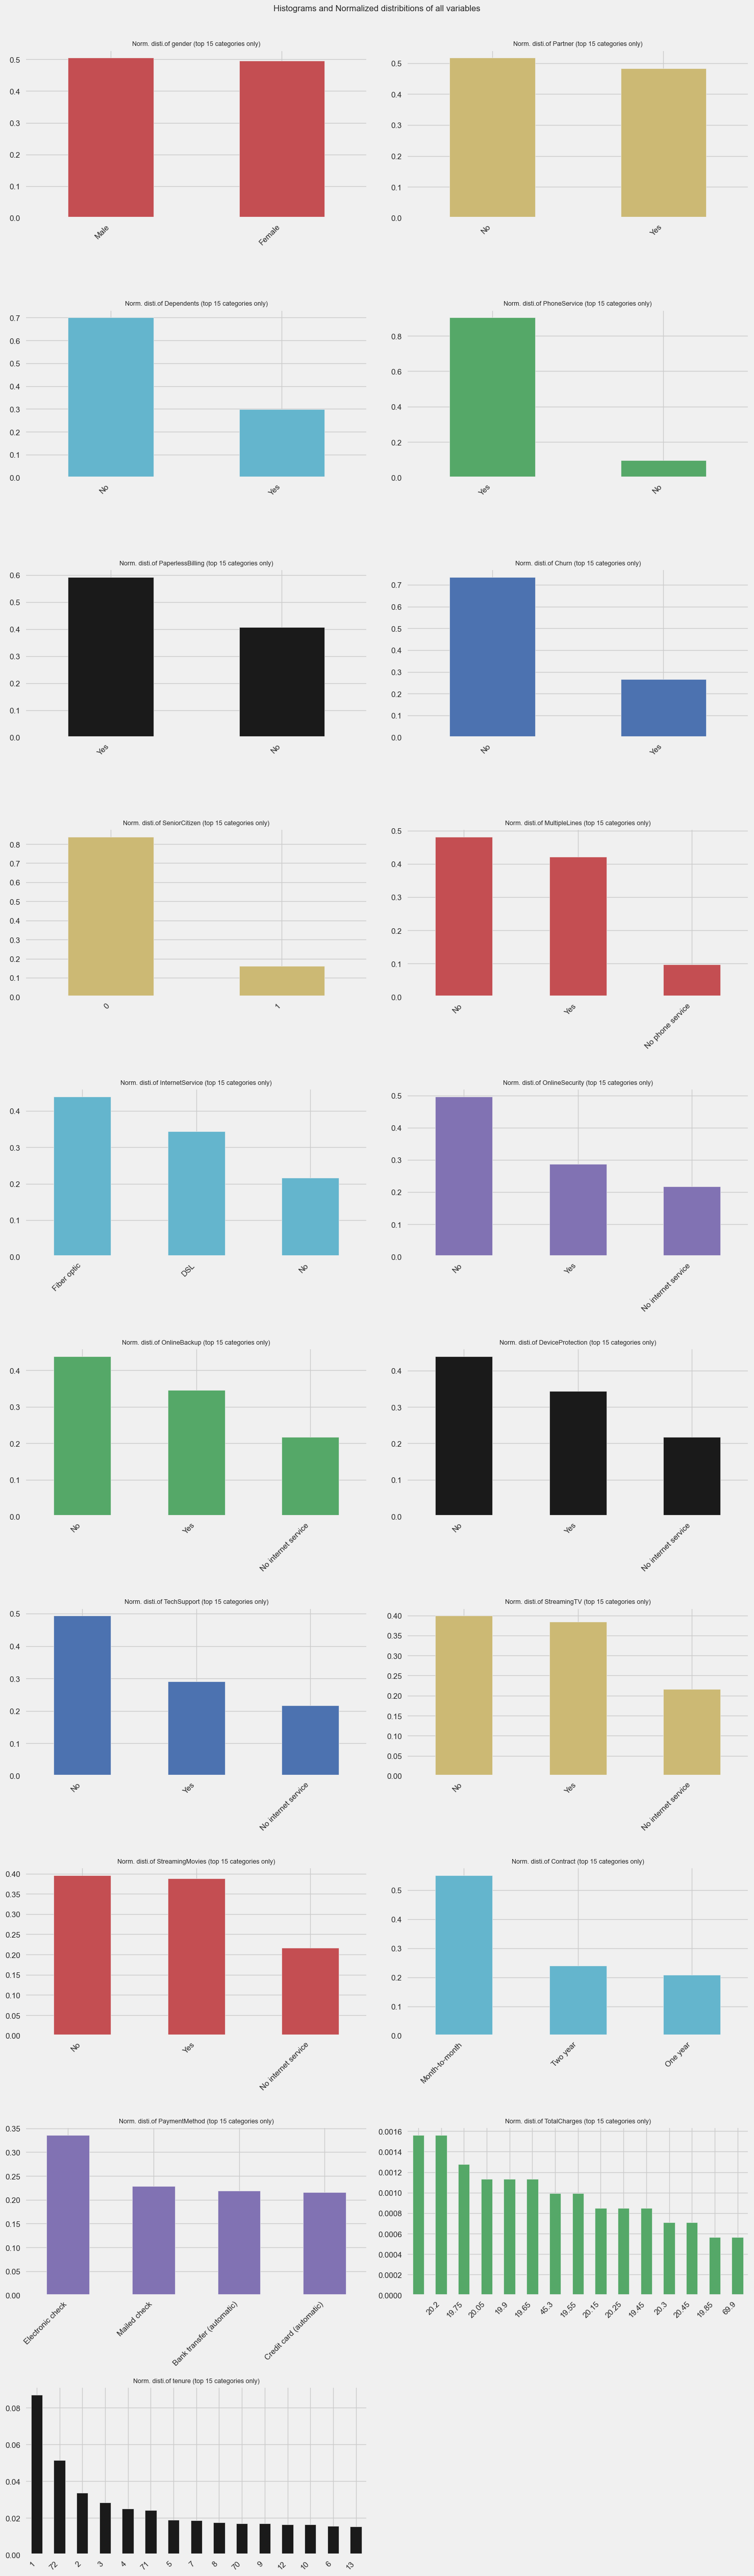

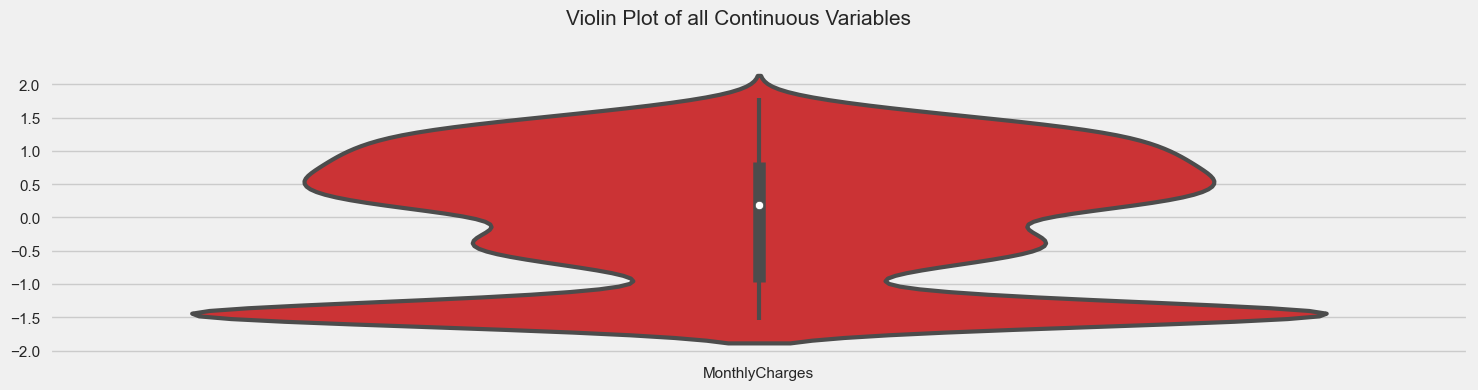

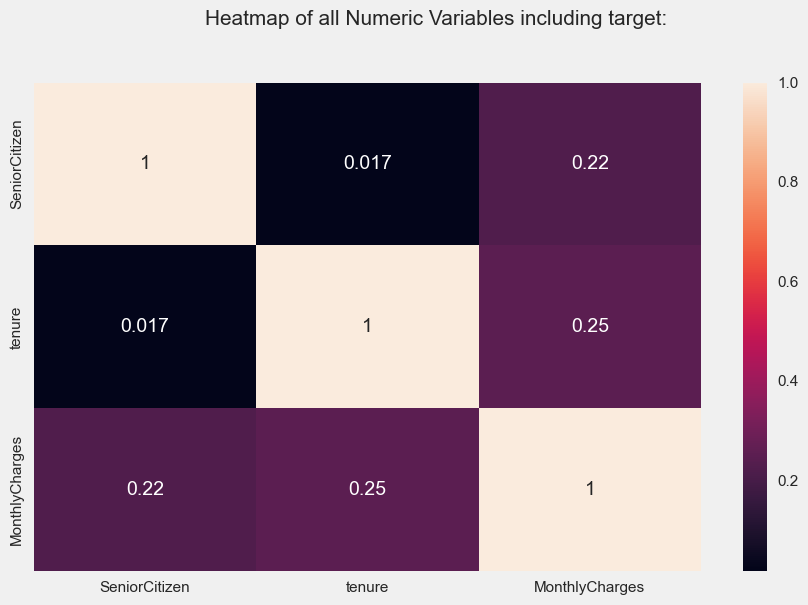

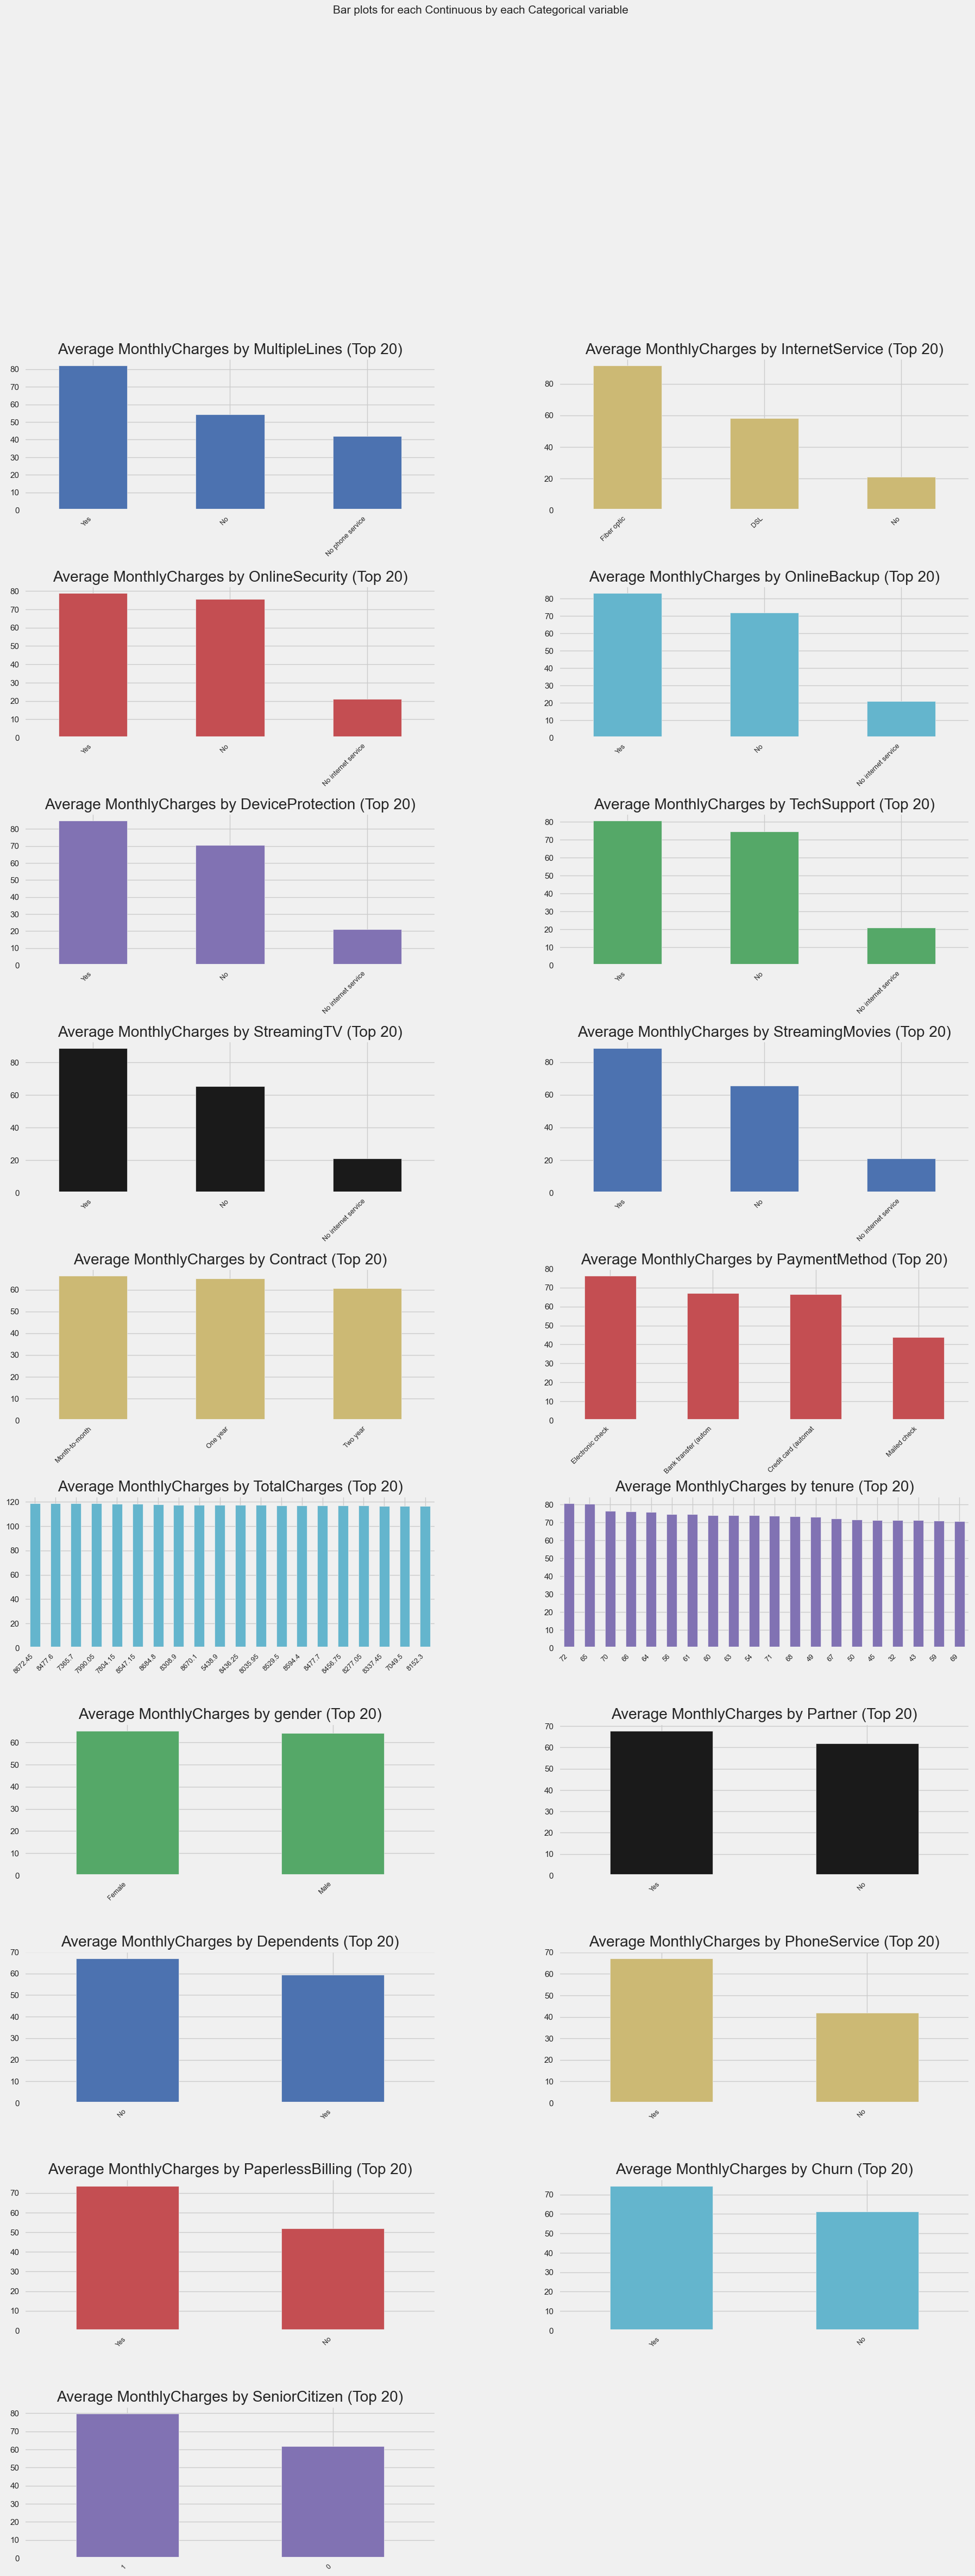

All Plots done
Time to run AutoViz = 16 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [15]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV=AutoViz_Class()
viz=AV.AutoViz('WA_Fn-UseC_-Telco-Customer-Churn.csv',sep=",")


In [16]:
data.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [19]:
cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn','InternetService','Contract','PaymentMethod','TotalCharges']
data[cols]=data[cols].apply(LabelEncoder().fit_transform)

In [21]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
x=data.drop('Churn',axis=1).values
y=data['Churn'].values

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=  0.25, random_state= 42)

In [26]:
x_train.shape

(5282, 19)

In [28]:
ann = models.Sequential([
    layers.Dense(units=15,activation='relu',input_dim=19),
    layers.Dense(500,activation='relu'),
    layers.Dense(400,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

ann.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=15)

Epoch 1/15
166/166 [==============================] - 1s 4ms/step - loss: 792.6365 - accuracy: 0.7315
Epoch 2/15
166/166 [==============================] - 1s 4ms/step - loss: 0.5798 - accuracy: 0.7368
Epoch 3/15
166/166 [==============================] - 1s 4ms/step - loss: 0.6150 - accuracy: 0.7368
Epoch 4/15
166/166 [==============================] - 1s 4ms/step - loss: 0.5791 - accuracy: 0.7368
Epoch 5/15
166/166 [==============================] - 1s 4ms/step - loss: 0.5792 - accuracy: 0.7368
Epoch 6/15
166/166 [==============================] - 1s 4ms/step - loss: 0.5772 - accuracy: 0.7368
Epoch 7/15
166/166 [==============================] - 1s 4ms/step - loss: 0.5778 - accuracy: 0.7368
Epoch 8/15
166/166 [==============================] - 1s 4ms/step - loss: 0.5775 - accuracy: 0.7368
Epoch 9/15
166/166 [==============================] - 1s 4ms/step - loss: 0.5767 - accuracy: 0.7368
Epoch 10/15
166/166 [==============================] - 1s 4ms/step - loss: 0.5774 - accuracy: 0.73

In [29]:
ann.evaluate(x_test, y_test)

56/56 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.7280


[0.5863648653030396, 0.7279954552650452]

In [35]:
single_predict= data.drop('Churn',axis=1).iloc[2]

In [43]:
predicted=ann.predict(x_test)

56/56 [==============================] - 0s 2ms/step


In [46]:
predicted*100

array([[29.653763],
       [29.653763],
       [29.653763],
       ...,
       [29.653763],
       [29.653763],
       [29.653763]], dtype=float32)